In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline
import codecs
from sklearn import preprocessing
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError
from sklearn import metrics

In [177]:
salary=pd.read_csv("salary.csv")

In [178]:
salary.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [179]:
salary.drop(["education","fnlwgt","capital-gain","capital-loss"],axis=1,inplace=True)

In [180]:

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
salary['sex']= label_encoder.fit_transform(salary['sex']) 
salary['sex'].value_counts()

1    21515
0    10660
Name: sex, dtype: int64

In [181]:
salary['salary'].value_counts()

 <=50K    24562
 >50K      7613
Name: salary, dtype: int64

In [182]:
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
salary['salary']= label_encoder.fit_transform(salary['salary']) 
salary['salary'].value_counts()

0    24562
1     7613
Name: salary, dtype: int64

In [183]:
salary['country']=salary['country'].astype('category')
salary.country = salary['country'].cat.codes
salary['country'].value_counts()

38    29378
25      643
29      197
10      137
1       118
32      114
7       106
18      100
4        95
8        90
22       81
34       78
2        75
21       72
5        70
39       67
12       64
23       61
30       59
3        59
35       50
13       44
19       43
31       37
26       34
28       31
9        29
11       29
6        28
20       24
16       20
0        19
37       19
36       18
24       18
40       16
27       14
15       13
17       13
33       11
14        1
Name: country, dtype: int64

In [184]:
salary['occupation']=salary['occupation'].astype('category')
salary.occupation = salary['occupation'].cat.codes
salary['occupation'].value_counts()

9     4114
2     4080
3     4043
0     3752
11    3629
7     3263
6     1988
14    1645
13    1585
5     1359
4      994
12     922
10     644
8      148
1        9
Name: occupation, dtype: int64

In [185]:
salary.nunique()

age               73
workclass          9
education-num     16
marital-status     7
occupation        15
relationship       6
race               5
sex                2
hours-per-week    94
country           41
salary             2
dtype: int64

In [186]:
salary= pd.get_dummies(data=salary, columns=['workclass','marital-status','relationship','race'])

In [187]:
salary.head()

,age,education-num,occupation,sex,hours-per-week,country,salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,39,13,0,1,40,38,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,50,13,3,1,13,38,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,38,9,5,1,40,38,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
3,53,7,5,1,40,38,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,9,0,40,4,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0


In [188]:
salary['salary'].value_counts()

0    24562
1     7613
Name: salary, dtype: int64

In [189]:
salary_less50 = salary[salary['salary']==0]
salary_more50 = salary[salary['salary']==1]

In [190]:
df_less_50 = salary_less50.sample(16000)

In [191]:
df_more_50 = salary_more50.sample(16000,replace=True)

In [192]:
df_more_50.shape

(16000, 34)

In [193]:
salary = pd.concat([df_less_50,df_more_50],axis=0)

In [194]:
salary.shape

(32000, 34)

In [195]:
X_classification=salary.drop('salary',axis=1)
X_classification.shape

(32000, 33)

In [196]:
y_classification=salary['salary']
y_classification

6342     0
16885    0
4673     0
25290    0
31793    0
        ..
27221    1
3190     1
14706    1
28969    1
8949     1
Name: salary, Length: 32000, dtype: int32

<AxesSubplot:>

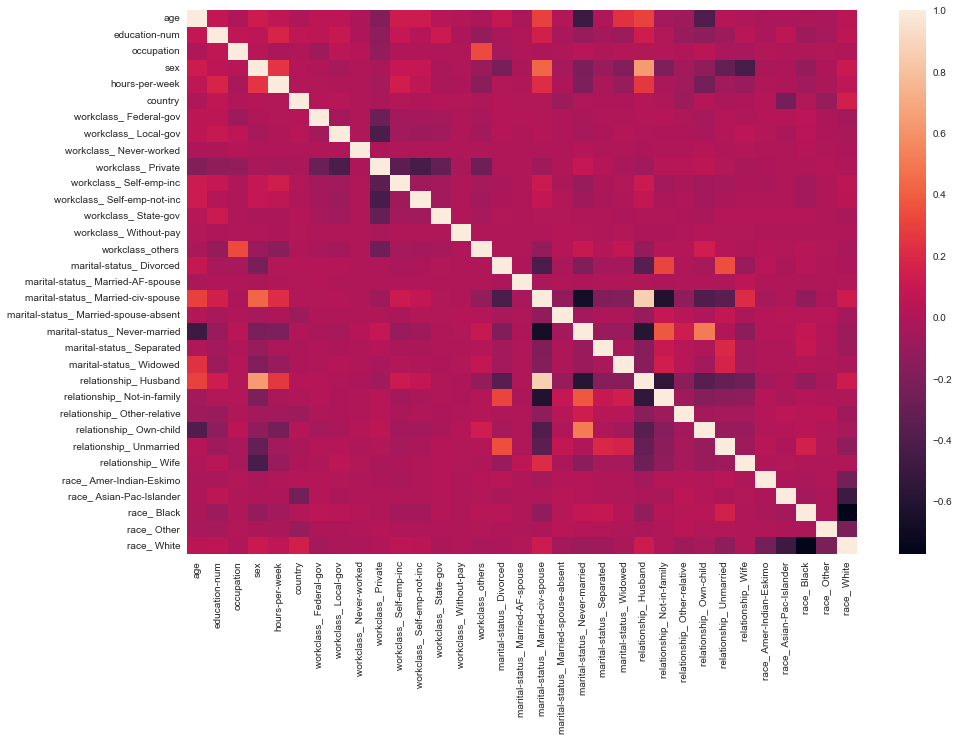

In [197]:
plt.figure(figsize=(15,10))
sns.heatmap(X_classification.corr())

In [198]:
salary.corr()

,age,education-num,occupation,sex,hours-per-week,country,salary,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,...,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Amer-Indian-Eskimo,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
age,1.000000,0.074443,-0.001716,0.117962,0.062861,0.003475,0.277738,0.053948,0.053940,-0.016462,...,-0.049619,-0.072599,-0.400039,0.011434,-0.003599,-0.026183,-0.010813,-0.029370,-0.032964,0.044813
education-num,0.074443,1.000000,0.062780,0.047761,0.174498,0.060396,0.387774,0.058306,0.100461,-0.011120,...,0.010154,-0.098473,-0.138145,-0.078728,0.038720,-0.028757,0.059115,-0.084897,-0.037778,0.054601
occupation,-0.001716,0.062780,1.000000,0.027949,-0.029956,-0.003837,-0.005968,-0.072955,0.046607,0.020408,...,0.008234,-0.008973,0.039498,-0.033473,-0.034750,0.004310,0.003305,-0.003160,0.010578,-0.002952
sex,0.117962,0.047761,0.027949,1.000000,0.250678,0.011746,0.265449,0.000624,-0.040140,-0.005852,...,-0.207791,-0.049020,-0.132932,-0.307320,-0.429436,-0.021778,-0.009715,-0.108282,-0.013211,0.102189
hours-per-week,0.062861,0.174498,-0.029956,0.250678,1.000000,0.009673,0.278137,0.005502,0.000526,-0.009041,...,-0.019267,-0.059379,-0.244426,-0.064109,-0.097438,-0.007032,-0.015325,-0.063003,-0.016607,0.065178
country,0.003475,0.060396,-0.003837,0.011746,0.009673,1.000000,0.027766,0.012232,0.028005,0.002828,...,0.002844,-0.083474,0.021508,-0.017284,-0.009713,0.014522,-0.244883,0.009028,-0.103370,0.143586
salary,0.277738,0.387774,-0.005968,0.265449,0.278137,0.027766,1.000000,0.063939,0.045272,-0.011181,...,-0.240653,-0.114831,-0.310182,-0.192353,0.121339,-0.037035,0.008278,-0.107662,-0.033933,0.101402
workclass_ Federal-gov,0.053948,0.058306,-0.072955,0.000624,0.005502,0.012232,0.063939,1.000000,-0.053891,-0.002160,...,0.018166,-0.009243,-0.044235,0.011947,-0.006161,0.011713,0.013699,0.046372,-0.011158,-0.045419
workclass_ Local-gov,0.053940,0.100461,0.046607,-0.040140,0.000526,0.028005,0.045272,-0.053891,1.000000,-0.003119,...,-0.014709,-0.012633,-0.036048,0.022750,0.046351,0.010128,-0.020112,0.038193,-0.013091,-0.019940
workclass_ Never-worked,-0.016462,-0.011120,0.020408,-0.005852,-0.009041,0.002828,-0.011181,-0.002160,-0.003119,1.000000,...,-0.005697,-0.001667,0.023534,-0.003237,0.008565,-0.001028,-0.002004,0.017862,-0.000891,-0.012914


In [199]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_classification, y_classification, test_size = 0.2, random_state =6)#, stratify=y_classification)

In [200]:
DT = DecisionTreeClassifier()
DT_model = DT.fit(X1_train, y1_train)
pred_DT = DT_model.predict(X1_test)
print(classification_report(y1_test,pred_DT,target_names=['<=50K','>50K']))

              precision    recall  f1-score   support

       <=50K       0.90      0.81      0.86      3224
        >50K       0.83      0.91      0.87      3176

    accuracy                           0.86      6400
   macro avg       0.87      0.86      0.86      6400
weighted avg       0.87      0.86      0.86      6400



In [201]:
#pred_DT
f1_score(y1_test, pred_DT, average='weighted', labels=np.unique(pred_DT))

0.8631428036896927

In [202]:
#Random forest with cross validation
log_rf = RandomForestClassifier(max_depth=2, random_state=0)
# Set the parameters by cross-validation,45
param_grid = {'n_estimators' : [50], 'max_depth': [40,45],
'min_samples_split': [3,5,7]}
cv = GridSearchCV(estimator = log_rf, param_grid = param_grid, cv = 5, scoring = 'f1_weighted')
RF = cv.fit(X1_train, y1_train)
RF.best_estimator_

RandomForestClassifier(max_depth=45, min_samples_split=3, n_estimators=50,
                       random_state=0)

In [203]:
print(RF.best_params_)
print(RF.best_estimator_)
print(RF.best_score_)
pred_test_rf = RF.predict(X1_test)
print(classification_report(y_true=y1_test,y_pred=pred_test_rf,target_names=['<=50K','>50K']))
f1_score(y1_test, pred_test_rf, average='weighted', labels=np.unique(pred_test_rf))

{'max_depth': 45, 'min_samples_split': 3, 'n_estimators': 50}
RandomForestClassifier(max_depth=45, min_samples_split=3, n_estimators=50,
                       random_state=0)
0.8695911565981035
              precision    recall  f1-score   support

       <=50K       0.92      0.83      0.88      3224
        >50K       0.85      0.93      0.89      3176

    accuracy                           0.88      6400
   macro avg       0.89      0.88      0.88      6400
weighted avg       0.89      0.88      0.88      6400



0.8813137896793853

In [204]:
RF_50 = RandomForestClassifier(n_estimators = 50,min_samples_split=3,max_depth=40)
RF_50_model = RF_50.fit(X1_train, y1_train)
pred_RF_50 = RF_50_model.predict(X1_test)
print(classification_report(y1_test, pred_RF_50))
print(mod_CV.best_score_)
f1_score(y1_test, pred_test_rf, average='weighted', labels=np.unique(pred_test_rf))

              precision    recall  f1-score   support

           0       0.93      0.83      0.88      3224
           1       0.84      0.93      0.89      3176

    accuracy                           0.88      6400
   macro avg       0.89      0.88      0.88      6400
weighted avg       0.89      0.88      0.88      6400

0.8874789749824759


0.8813137896793853

In [205]:
print(confusion_matrix(y1_test,pred_DT))

[[2626  598]
 [ 276 2900]]


In [206]:

log_svm_svc = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5, dual=False, max_iter=7600))
model_svm_svc = log_svm_svc.fit(X1_train, y1_train)
y_pred = model_svm_svc.predict(X1_test)
class_rep = classification_report(y1_test, y_pred, target_names = ['<=50K','>50K'])
print(class_rep)
f1_score(y1_test, pred_test_rf, average='weighted', labels=np.unique(pred_test_rf))

              precision    recall  f1-score   support

       <=50K       0.84      0.75      0.79      3224
        >50K       0.77      0.86      0.81      3176

    accuracy                           0.80      6400
   macro avg       0.81      0.80      0.80      6400
weighted avg       0.81      0.80      0.80      6400



0.8813137896793853

In [207]:
#result = pd.concat([pd.DataFrame(pred_prob_RF_200), X1_test], axis=1)
result = pd.concat(X1_test], axis=1)
result.to_csv("prob2.csv")

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (Temp/ipykernel_11816/3412934267.py, line 2)

In [208]:
from sklearn.inspection import permutation_importance
results = permutation_importance(RF_50_model, X_classification, y_classification, scoring='neg_mean_squared_error')

Feature: 0, Score: 0.16675
Feature: 1, Score: 0.16747
Feature: 2, Score: 0.12361
Feature: 3, Score: 0.02198
Feature: 4, Score: 0.12354
Feature: 5, Score: 0.01417
Feature: 6, Score: 0.00443
Feature: 7, Score: 0.00634
Feature: 8, Score: 0.00000
Feature: 9, Score: 0.02348
Feature: 10, Score: 0.00789
Feature: 11, Score: 0.01653
Feature: 12, Score: 0.00501
Feature: 13, Score: 0.00003
Feature: 14, Score: 0.00200
Feature: 15, Score: 0.00749
Feature: 16, Score: 0.00019
Feature: 17, Score: 0.02701
Feature: 18, Score: 0.00047
Feature: 19, Score: 0.01715
Feature: 20, Score: 0.00144
Feature: 21, Score: 0.00161
Feature: 22, Score: 0.01957
Feature: 23, Score: 0.02101
Feature: 24, Score: 0.00047
Feature: 25, Score: 0.00402
Feature: 26, Score: 0.00381
Feature: 27, Score: 0.00594
Feature: 28, Score: 0.00159
Feature: 29, Score: 0.00284
Feature: 30, Score: 0.00539
Feature: 31, Score: 0.00028
Feature: 32, Score: 0.01133


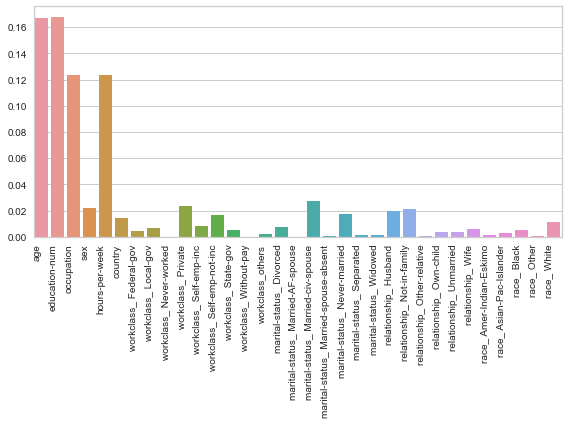

In [209]:
importance = results.importances_mean

for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(8,6))
ax = sns.barplot(y=importance, x=X_classification.columns)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.tight_layout()
plt.show()

<AxesSubplot:>

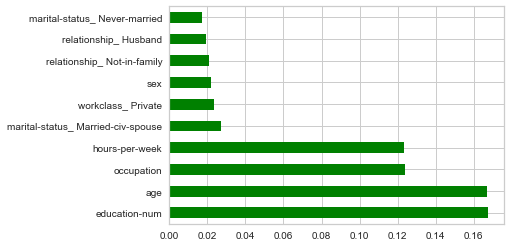

In [211]:
pd.Series(importance, index=X_classification.columns).nlargest(10).plot(kind='barh', color='green')

In [217]:
pd.Series(importance, index=X_classification.columns).nlargest(10)

education-num                         0.167475
age                                   0.166750
occupation                            0.123612
hours-per-week                        0.123544
marital-status_ Married-civ-spouse    0.027006
workclass_ Private                    0.023481
sex                                   0.021981
relationship_ Not-in-family           0.021006
relationship_ Husband                 0.019575
marital-status_ Never-married         0.017150
dtype: float64

In [212]:
top_10_var = np.array(pd.Series(importance, index=X_classification.columns).nlargest(10).index)

In [213]:
top_10_df = X_classification.loc[:,top_10_var]

<AxesSubplot:>

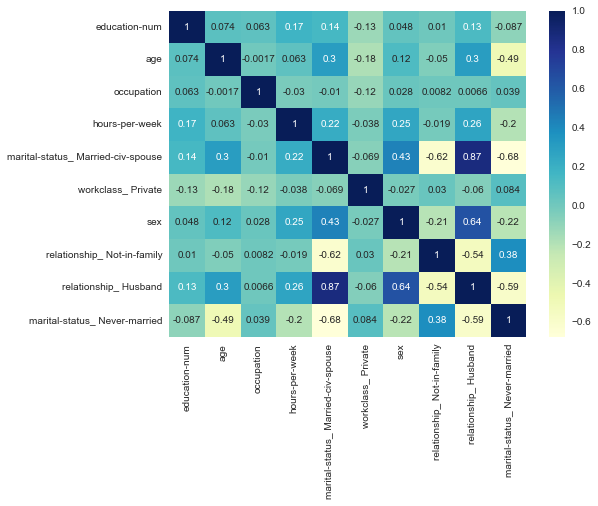

In [214]:
plt.figure(figsize=(8,6))
sns.heatmap(top_10_df.corr(), cmap="YlGnBu", annot=True)

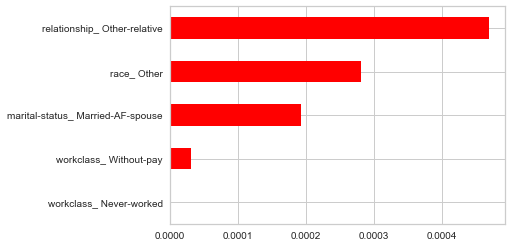

In [215]:
pd.Series(importance, index=X_classification.columns).nsmallest(5).plot(kind='barh', color='red')

least_5_var = np.array(pd.Series(importance, index=X_classification.columns).nsmallest(5).index)
least_5_df = X_classification.loc[:,least_5_var]

<AxesSubplot:>

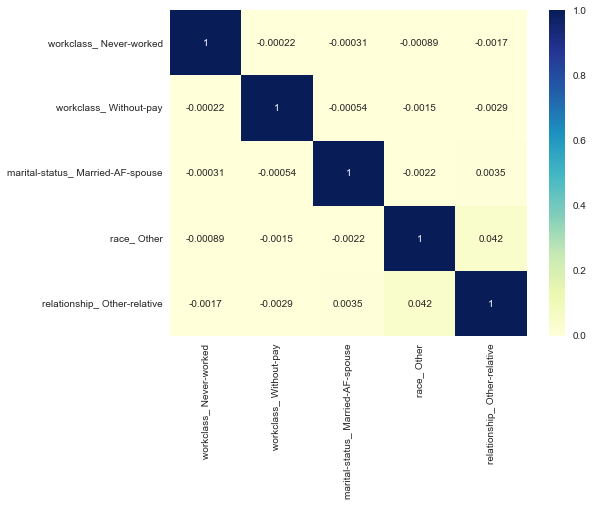

In [216]:
plt.figure(figsize=(8,6))
sns.heatmap(least_5_df.corr(), cmap="YlGnBu", annot=True)

In [231]:
X_final=salary[['education-num','age','occupation','hours-per-week','marital-status_ Married-civ-spouse','workclass_ Private','sex','relationship_ Not-in-family','relationship_ Husband','marital-status_ Never-married']]
y_final=salary['salary']


In [232]:
X1_trainf, X1_testf, y1_trainf, y1_testf = train_test_split(X_final, y_final, test_size = 0.2, random_state =6)#, stratify=y_classification)

In [233]:
RF_50 = RandomForestClassifier(n_estimators = 50,min_samples_split=3,max_depth=40)
RF_50_model = RF_50.fit(X1_trainf, y1_trainf)
pred_RF_50 = RF_50_model.predict(X1_testf)
print(classification_report(y1_testf, pred_RF_50))
print(mod_CV.best_score_)
f1_score(y1_test, pred_test_rf, average='weighted', labels=np.unique(pred_test_rf))

              precision    recall  f1-score   support

           0       0.91      0.82      0.87      3224
           1       0.84      0.92      0.88      3176

    accuracy                           0.87      6400
   macro avg       0.87      0.87      0.87      6400
weighted avg       0.87      0.87      0.87      6400

0.8874789749824759


0.8813137896793853